# N-Iters analysis
Analysis of ER_AML and ER_ACE strategies on changing of niters parameter.
`niters` is the hyperparam of iterations done for each new minibatch. The loss for each of these iterations is computed with the same new minibatch and a random sampling of buffer replay.

Import of libraries.

In [1]:
import json

from src.utils.plot import plot_over_experiences, plot_forgetting, plot_accuracy_tables, plot_general_results, plot_bn_stats_over_epochs, plot_bn_difference_over_epochs

Loading niters results data.

In [2]:
with open('../data/niters_results.json') as file:
    niters_results = json.load(file)

General results in terms of AAA and accuracy related to ER_AML and ER_ACE with niters set to 1, 2 and 4. We can tell that:
- AAA: grows with the number of niters. The growing seems to have a logarithmic behavior.
- accuracy: seems to be higher with 2 niters; in fact the mean of accuracies after last learned experience tends to decrease increasing the number of niters from 2 to 4.

In [3]:
plot_general_results(niters_results)

,ER_ACE [niters=1],ER_ACE [niters=2],ER_ACE [niters=4],ER_AML [niters=1],ER_AML [niters=2],ER_AML [niters=4]
AAA,29.22 %,36.9 %,38.72 %,27.6 %,34.64 %,36.98 %
accuracy,22.95 %,28.69 %,26.22 %,24.85 %,27.66 %,24.89 %
strategy_train_mb_size,10,10,10,10,10,10
strategy_eval_mb_size,10,10,10,10,10,10
strategy_train_epochs,1,1,1,1,1,1
strategy_mem_size,10000,10000,10000,10000,10000,10000
strategy_batch_size_mem,10,10,10,10,10,10
strategy_n_iters,1,2,4,1,2,4
sgd_lr,0.1,0.1,0.1,0.1,0.1,0.1
sgd_momentum,0,0,0,0,0,0


Plot of strategies accuracy over experiences. Seem that ER_AML and ER_ACE with the same number of niters have more or less the same curve. Another observation could be that with niters=1 the curve is lower and increasing the hyperparam it starts to grow in a logarithmic way.

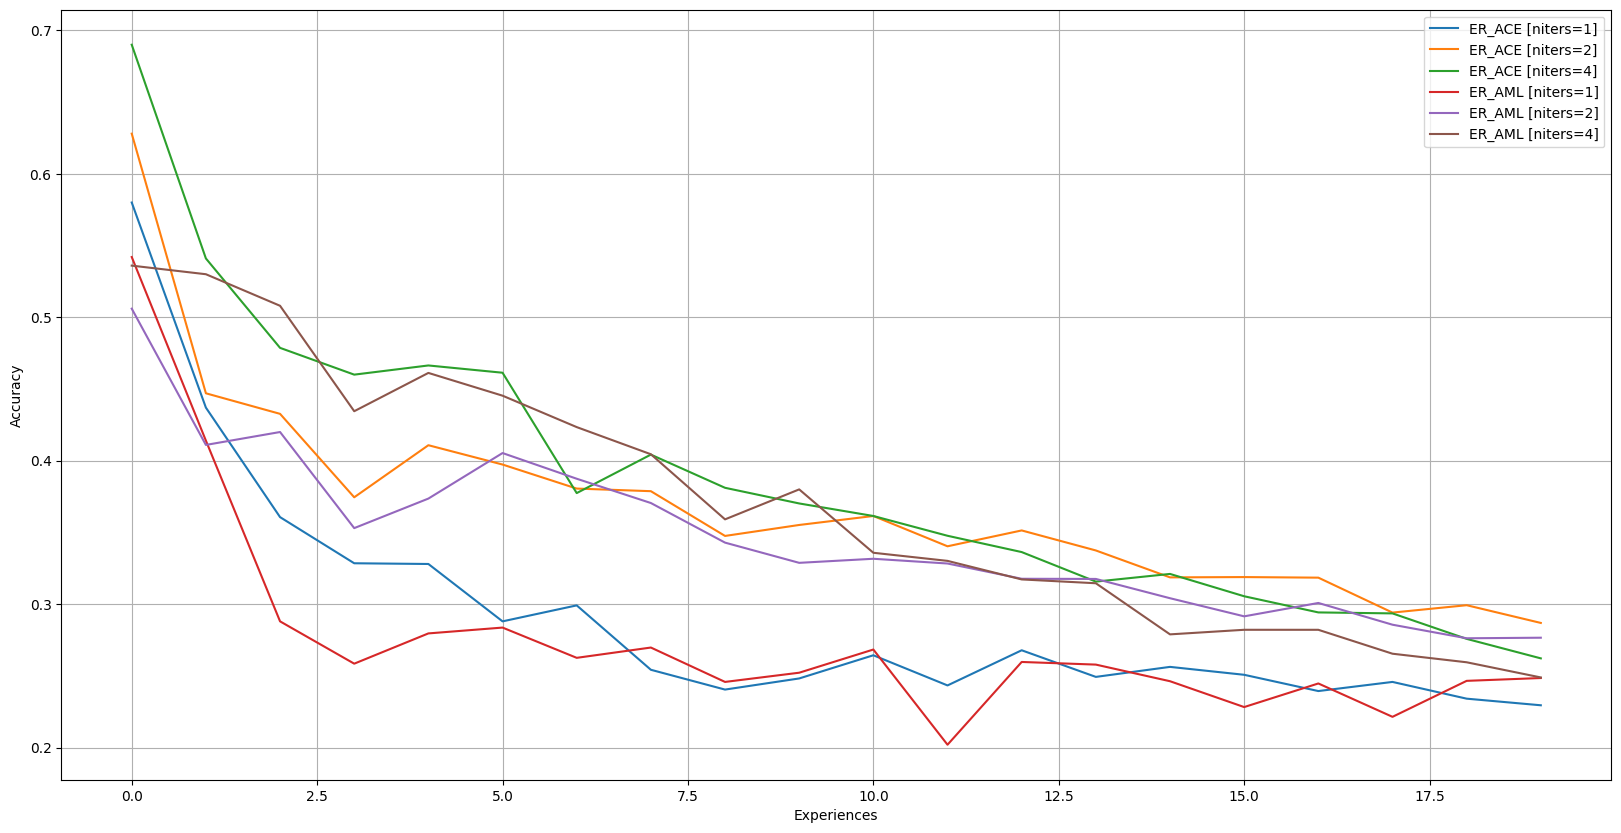

In [4]:
plot_over_experiences(
    {k: [sum(x.values()) / len(x.values()) for x in v['info']] for k, v in niters_results.items()},
    xlabel='Experiences',
    ylabel='Accuracy'
)

Plot of histogram related to the strategies forgetting. We can tell that only ER_AML with niters=1 is able to have backward transfer that is lost with the increasing of the hyperparam. In general using niters=4 brings to have an higher forgetting. This behavior can be expected because at each experience we look more times the new data so we could expect to forget the older ones.

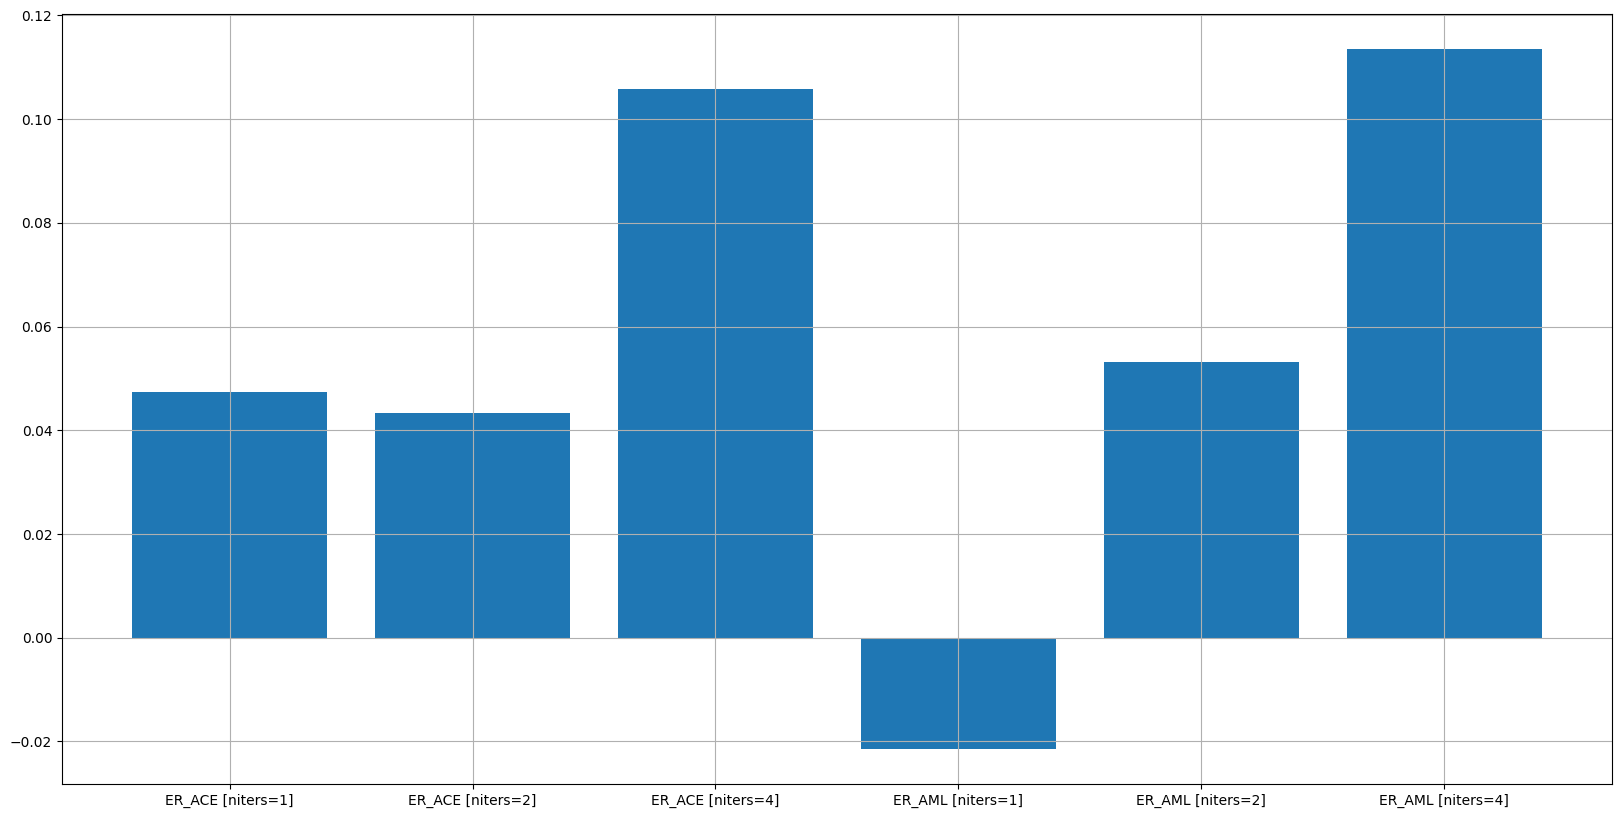

In [5]:
plot_forgetting(niters_results)